# Problem 3 - Predicting Whether the song will be popualr or not.


Presenters: Team 6 \
Andrew Rafael James \
Doris Liang \
Hunter Guo \
Monica Ko \
Pang Leesuravanich

Load Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, precision_score, 
    recall_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Load dataset

In [669]:
df = pd.read_csv('spotify_clean_dataset_with_lyrics.csv')

In [670]:
df.head()

,Unnamed: 0,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,lyrics
0,0,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,Fader,spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,spotify:album:0V59MMtgoruvEqMv18KAOH,Conditions (Tour Edition),spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,2009,https://i.scdn.co/image/ab67616d0000b273f86ae8...,1,6,192373,https://p.scdn.co/mp3-preview/14264bd1501d2723...,False,0,GBZUZ0900014,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"indietronica,modern rock,shimmer pop",0.532,0.760,11.0,-7.123,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,Liberation Records,"C 2010 Liberation Music, P 2010 Liberation Music","I'm in transit\n Floating, stranded on this bo..."
1,1,spotify:track:0NpvdCO506uO58D4AbKzki,Sherry,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,spotify:album:0NUEQILaBzavnzcMEs4buZ,The Very Best of Frankie Valli & The 4 Seasons,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,2003-01-14,https://i.scdn.co/image/ab67616d0000b273b96c21...,1,1,152160,https://p.scdn.co/mp3-preview/e3f765262ebc349e...,False,54,USRH10175197,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"adult standards,bubblegum pop,doo-wop,lounge,n...",0.703,0.478,7.0,-8.062,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,Rhino,C © 2004 Bob Gaudio & Frankie Valli d/b/a The ...,"Sherry, Sherry baby\n Sherry, Sherry baby\n Sh..."
2,2,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,I Took A Pill In Ibiza - Seeb Remix,"spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...","Mike Posner, Seeb",spotify:album:1Tz3Ai1guEFf4hV3d9i17K,"At Night, Alone.",spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Mike Posner,2016-05-06,https://i.scdn.co/image/ab67616d0000b273a19be7...,1,13,197933,https://p.scdn.co/mp3-preview/7bae6aac6d699135...,True,63,USUM71509342,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,pop,pop dance,pop rap,pop dance",0.664,0.714,7.0,-6.645,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,"Monster Mountain, LLC / Island","C © 2016 Island Records, a division of UMG Rec...",NaN
3,3,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Let Go for Tonight,spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,spotify:album:5AQ7uKRSpAv7SNUl4j24ru,Glorious (Deluxe),spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,2014-05-12,https://i.scdn.co/image/ab67616d0000b273ae5c7d...,1,5,238413,https://p.scdn.co/mp3-preview/84a003d72f9f1468...,False,39,GBARL1301249,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"electropop,metropopolis,uk pop",0.543,0.808,9.0,-6.615,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,Sign Of The Times Records,P (P) 2014 Sign Of The Times Limited under exc...,Fell from the sky\n We fell from the sky and s...
4,4,spotify:track:7KdcZQ3GJeGdserhK61kfv,The Way I Want To Touch You,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,spotify:album:3GUxesVyOehInaxJyCTh6d,Love Will Keep Us Together,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,1975-01-01,https://i.scdn.co/image/ab67616d0000b273e21a28...,1,3,163586,https://p.scdn.co/mp3-preview/9e7a4a7b7dc56dc3...,False,35,USAM10110025,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"mellow gold,soft rock,yacht rock",0.664,0.585,0.0,-7.062,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,A&M,"C © 1975 A&M Records, P This Compilation ℗ 197...","I never wanted, I never wanted to touch a man\..."


In [671]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9993 non-null   object 
 1   Track Name            9993 non-null   object 
 2   Artist URI(s)         9993 non-null   object 
 3   Artist Name(s)        9993 non-null   object 
 4   Album URI             9993 non-null   object 
 5   Album Name            9993 non-null   object 
 6   Album Artist URI(s)   9993 non-null   object 
 7   Album Artist Name(s)  9993 non-null   object 
 8   Album Release Date    9993 non-null   object 
 9   Album Image URL       9993 non-null   object 
 10  Disc Number           9993 non-null   int64  
 11  Track Number          9993 non-null   int64  
 12  Track Duration (ms)   9993 non-null   int64  
 13  Track Preview URL     9993 non-null   object 
 14  Explicit              9993 non-null   bool   
 15  Popularity           

In [673]:
df.describe()

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,9993.000000,9993.000000,9.993000e+03,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,1.033423,4.937957,2.242449e+05,32.559292,0.608324,0.684020,5.171520,-7.252160,0.698289,0.065032,0.208298,0.029437,0.185249,0.586262,121.530139,3.960272
std,0.310743,5.464837,5.409599e+04,27.526200,0.145719,0.191112,3.583808,3.278442,0.459024,0.061055,0.248953,0.123854,0.148282,0.238920,26.232515,0.248137
min,1.000000,1.000000,6.009300e+04,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.921030e+05,0.000000,0.515000,0.561000,2.000000,-9.020000,0.000000,0.033100,0.018200,0.000000,0.089100,0.399000,102.774000,4.000000
50%,1.000000,3.000000,2.194260e+05,34.000000,0.618000,0.713000,5.000000,-6.496000,1.000000,0.042900,0.095300,0.000006,0.127000,0.599000,120.753000,4.000000
75%,1.000000,7.000000,2.498260e+05,57.000000,0.710000,0.836000,8.000000,-4.878000,1.000000,0.067600,0.317000,0.000570,0.245000,0.783000,134.303000,4.000000
max,15.000000,93.000000,1.561133e+06,94.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000


Check missing value

In [674]:
df.isna().sum()

Track URI                  0
Track Name                 0
Artist URI(s)              0
Artist Name(s)             0
Album URI                  0
Album Name                 0
Album Artist URI(s)        0
Album Artist Name(s)       0
Album Release Date         0
Album Image URL            0
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL          0
Explicit                   0
Popularity                 0
ISRC                       0
Added By                   0
Added At                   0
Artist Genres              0
Danceability               0
Energy                     0
Key                        0
Loudness                   0
Mode                       0
Speechiness                0
Acousticness               0
Instrumentalness           0
Liveness                   0
Valence                    0
Tempo                      0
Time Signature             0
Label                      0
Copyrights                 0
lyrics        

Drop duplication

In [675]:
df=df.drop_duplicates()
df.shape

(9946, 35)

In [676]:
len(df['Artist Name(s)'].unique())

4153

In [677]:
df['Artist Name(s)'].value_counts().head(20)

Artist Name(s)
Taylor Swift          50
P!nk                  47
Elvis Presley         46
Ed Sheeran            40
The Beatles           38
U2                    38
Madonna               35
The Rolling Stones    33
Bee Gees              30
INXS                  30
Katy Perry            30
Kylie Minogue         29
Powderfinger          27
Queen                 27
Britney Spears        27
Maroon 5              27
Elton John            27
Justin Bieber         27
Bon Jovi              26
Rihanna               25
Name: count, dtype: int64

In [678]:
df.loc[df['Track URI']=='spotify:track:7hQJA50XrCWABAu5v6QZ4i']

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,lyrics
3322,spotify:track:7hQJA50XrCWABAu5v6QZ4i,Don't Stop Me Now - Remastered 2011,spotify:artist:1dfeR4HaWDbWqFHLkxsg1d,Queen,spotify:album:21HMAUrbbYSj9NiPPlGumy,Jazz (Deluxe Remastered Version),spotify:artist:1dfeR4HaWDbWqFHLkxsg1d,Queen,1978-11-10,https://i.scdn.co/image/ab67616d0000b273008b06...,1,12,209413,https://p.scdn.co/mp3-preview/857030fc088d0d4f...,False,73,GBUM71029610,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"classic rock,glam rock,rock",0.563,0.865,5.0,-5.277,1.0,0.16,0.0472,0.000191,0.77,0.601,156.271,4.0,Hollywood Records,"C © 2011 Hollywood Records, Inc., P ℗ 2011 Hol...",NaN


Load Clustering dataset

In [679]:
df_cluster=pd.read_csv('kmeans_4_clusters.csv')
#df_cluster=df_cluster.drop_duplicates()
df_cluster.shape

(9993, 10)

In [680]:
df_cluster=df_cluster.drop(columns=['Unnamed: 0']).drop_duplicates()
df_cluster.shape

(9945, 9)

In [681]:

df = pd.merge(df, df_cluster[['Track URI', 'Artist Name(s)', 'Track Characteristics', 'Popularity', 'Album Name', 'Album Release Date']], how='left', on=['Track URI', 'Artist Name(s)', 'Popularity', 'Album Name', 'Album Release Date'])

In [682]:
df.shape

(9946, 36)

In [683]:
df[['Track Characteristics']].value_counts()

Track Characteristics    
Danceable & Vocal            4229
Energetic & Electric         3242
Acoustic & Quiet             2159
Instrumental & Pure Music     316
Name: count, dtype: int64

Check popularity scores

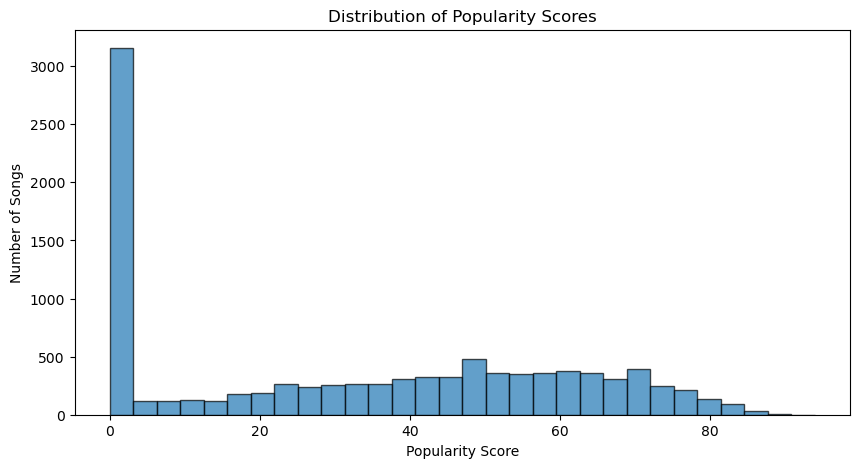

In [684]:
# Plot the distribution of Popularity scores
plt.figure(figsize=(10, 5))
plt.hist(df["Popularity"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Popularity Score")
plt.ylabel("Number of Songs")
plt.title("Distribution of Popularity Scores")
plt.show()

In [685]:
df['Popularity'].median()

34.0

In [686]:
# To calculate the mean popularity of songs with the same track name and artist name
aggregated_df = df.groupby(['Track Name', 'Artist Name(s)'])['Popularity'].mean().reset_index()
aggregated_df.head(20)

,Track Name,Artist Name(s),Popularity
0,! (The Song Formerly Known As),Regurgitator,43.0
1,"""The Take Over, The Breaks Over""",Fall Out Boy,0.0
2,#Beautiful,"Mariah Carey, Miguel",20.0
3,#SELFIE,The Chainsmokers,0.0
4,#WHERESTHELOVE - Charity Single,"Black Eyed Peas, The World",0.0
5,#thatPOWER,"will.i.am, Justin Bieber",32.0
6,'74-'75,The Connells,0.0
7,'Til You Do Me Right,After 7,32.0
8,(Baby I've Got You) On My Mind,Powderfinger,18.0
9,(Can't Get My) Head Around You,The Offspring,60.0


In [687]:
len(df.loc[df['Popularity']>= 70])

1011

In [688]:
len(df.loc[df['Popularity']== 0])

2843

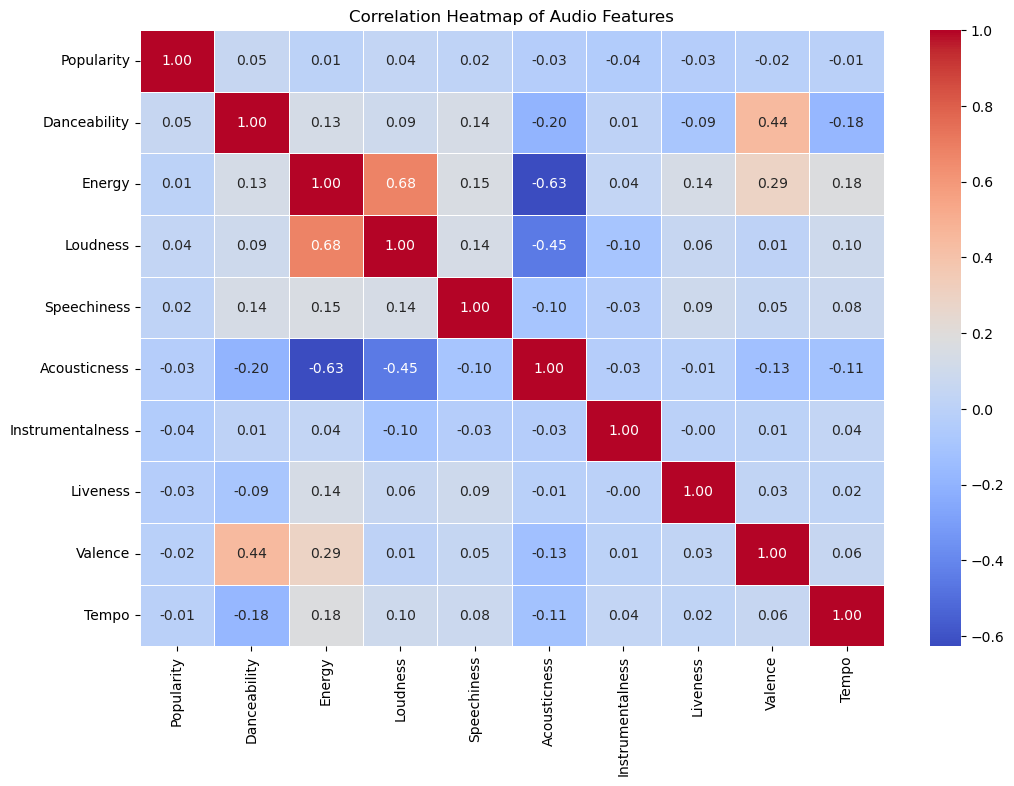

In [689]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 
                'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Audio Features")
plt.show()

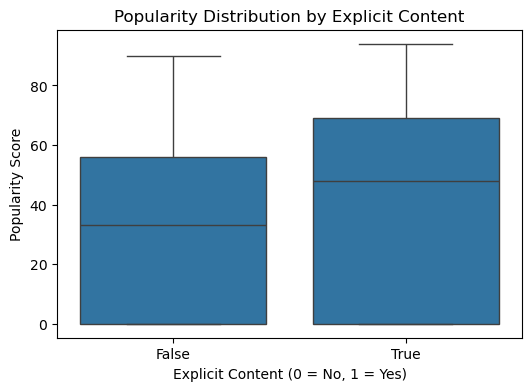

In [690]:
# Boxplot: Popularity distribution by explicit content
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Explicit'], y=df['Popularity'])
plt.xlabel("Explicit Content (0 = No, 1 = Yes)")
plt.ylabel("Popularity Score")
plt.title("Popularity Distribution by Explicit Content")
plt.show()

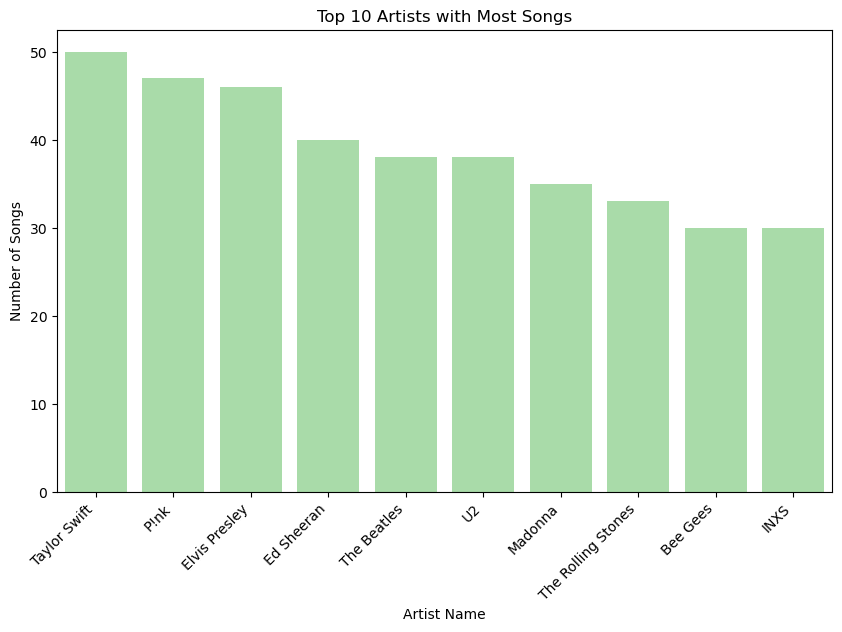

In [703]:
# Top 10 artists with the most number of songs
top_artists = df['Artist Name(s)'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, color="#A1E3A1")
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()


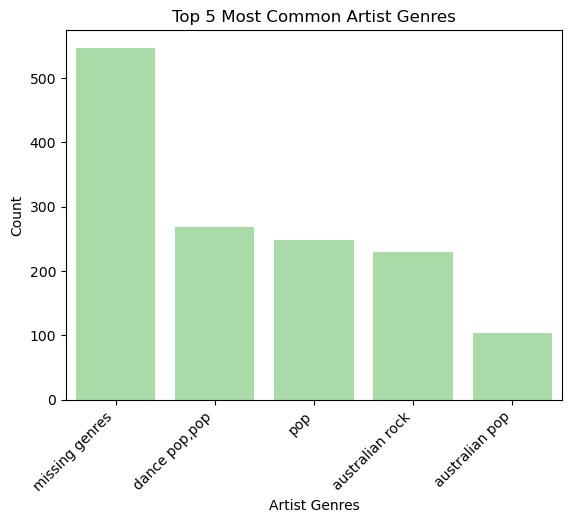

In [702]:
# Top 5 most common artist genres
top_artist_genres = df['Artist Genres'].value_counts().nlargest(5)
#plt.figure(figsize=(10, 6))
sns.barplot(x=top_artist_genres.index, y=top_artist_genres.values, color="#A1E3A1")
plt.title('Top 5 Most Common Artist Genres')
plt.xlabel('Artist Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Check genres

In [693]:
# Split genres by commas and flatten the list
genre_list = df['Artist Genres'].dropna().str.split(',').explode()

# Count occurrences of each genre
genre_counts = genre_list.value_counts()

# Display the top 50 genres
print(genre_counts.head(20))

Artist Genres
pop                   2655
dance pop             1655
rock                  1302
soft rock              974
classic rock           840
mellow gold            743
australian rock        688
album rock             649
new wave pop           608
rap                    559
missing genres         547
australian pop         534
pop rap                522
singer-songwriter      494
urban contemporary     474
permanent wave         456
pop dance              448
r&b                    441
hip hop                437
uk pop                 419
Name: count, dtype: int64


In [694]:
len(genre_counts)

908

In [695]:
df['Label'].value_counts().head(20)

Label
Universal Music Group                  836
Columbia                               441
RCA Records Label                      297
Sony Music Entertainment               283
Universal Music Australia Pty. Ltd.    276
WM Australia                           260
Parlophone UK                          230
Capitol Records                        215
Epic                                   196
Warner Records                         174
Atlantic Records                       152
Atlantic Records UK                    112
Rhino                                  109
Virgin Records                         105
Rhino Atlantic                          99
Arista                                  88
Jive                                    86
Bloodlines                              80
Polydor Records                         80
UMC (Universal Music Catalogue)         79
Name: count, dtype: int64

Extract Album Release Year

In [696]:
# Extract only the first four characters (year)
df['Album Release Year'] = df['Album Release Date'].astype(str).str[:4]

# Display the first few rows
print(df[['Album Release Date', 'Album Release Year']].head())

  Album Release Date Album Release Year
0               2009               2009
1         2003-01-14               2003
2         2016-05-06               2016
3         2014-05-12               2014
4         1975-01-01               1975


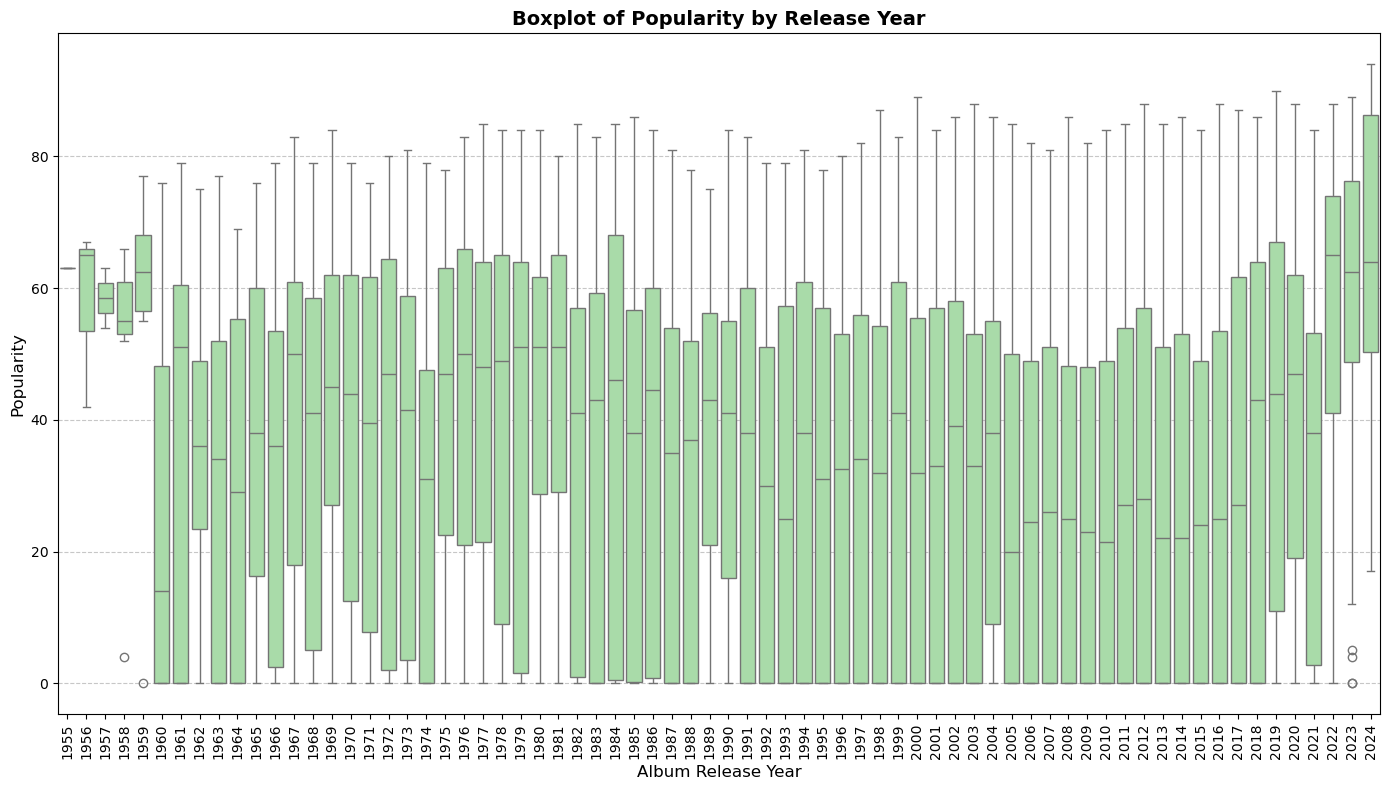

In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
data_for_boxplot = df[['Album Release Year', 'Popularity']]

# Ensure the release year is numeric and filter out unknown values
data_for_boxplot = data_for_boxplot[pd.to_numeric(data_for_boxplot['Album Release Year'], errors='coerce').notna()]
data_for_boxplot['Album Release Year'] = data_for_boxplot['Album Release Year'].astype(int)

# Sort by release year
data_for_boxplot = data_for_boxplot.sort_values(by='Album Release Year')

# Set Spotify green color
spotify_green = "#A1E3A1"

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_for_boxplot, x='Album Release Year', y='Popularity', color=spotify_green)

# Enhance visualization
plt.xticks(rotation=90)  # Rotate X-axis labels for better readability
plt.title('Boxplot of Popularity by Release Year', fontsize=14, fontweight='bold')
plt.xlabel('Album Release Year', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for readability
plt.tight_layout()

# Show plot
plt.show()


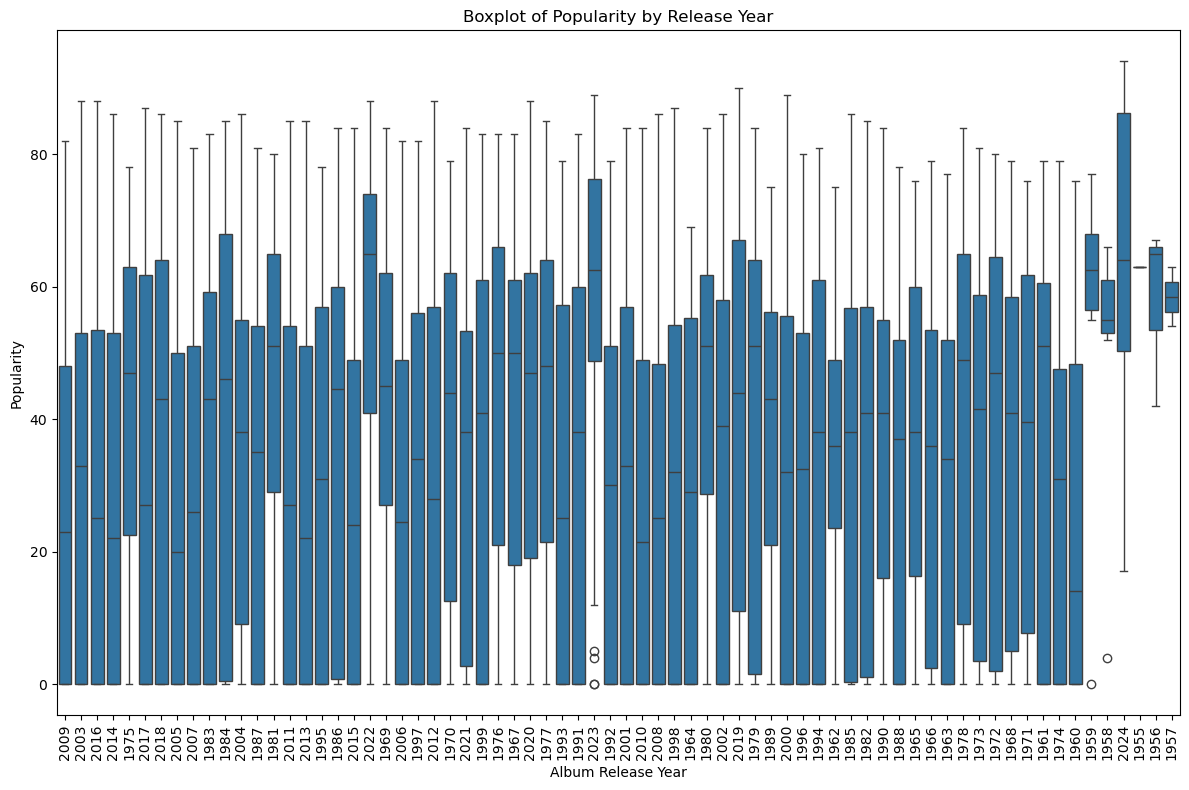

In [698]:
# Selecting relevant columns for the plot: Release Year and Popularity
data_for_boxplot = df[['Album Release Year', 'Popularity']]

# Handle missing values in the 'Artist Genres' column
data_for_boxplot['Album Release Year'].fillna('Unknown', inplace=True)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_for_boxplot, x='Album Release Year', y='Popularity')
plt.xticks(rotation=90)
plt.title('Boxplot of Popularity by Release Year')
plt.xlabel('Album Release Year')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Create new column to identify song is popular or not

In [699]:
# Define Popularity Threshold (Median Split)
popularity_threshold = df['Popularity'].median()
#df['is_popular'] = (df['Popularity'] > popularity_threshold).astype(int)
df['is_popular'] = (df['Popularity'] >= 50).astype(int)

In [623]:
df.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Label', 'Copyrights',
       'lyrics', 'Track Characteristics', 'Album Release Year', 'is_popular'],
      dtype='object')

In [624]:
df.shape

(9946, 38)

In [625]:
df1 = df[['Artist Name(s)', 'Disc Number', 'Track Number', 'Track Duration (ms)', 'Explicit', 'Popularity', 'Artist Genres', 'Danceability', 'Energy', 'Key', 'Loudness',
          'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Release Year', 'Track Characteristics', 'is_popular']]

In [626]:
df1 = pd.get_dummies(df1, columns=["Track Characteristics"], prefix="TrackChar")

In [628]:
df1.head()

,Artist Name(s),Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Release Year,is_popular,TrackChar_Acoustic & Quiet,TrackChar_Danceable & Vocal,TrackChar_Energetic & Electric,TrackChar_Instrumental & Pure Music
0,The Temper Trap,1,6,192373,False,0,"indietronica,modern rock,shimmer pop",0.532,0.760,11.0,-7.123,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,2009,0,False,False,False,True
1,Frankie Valli & The Four Seasons,1,1,152160,False,54,"adult standards,bubblegum pop,doo-wop,lounge,n...",0.703,0.478,7.0,-8.062,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,2003,1,True,False,False,False
2,"Mike Posner, Seeb",1,13,197933,True,63,"dance pop,pop,pop dance,pop rap,pop dance",0.664,0.714,7.0,-6.645,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,2016,1,False,True,False,False
3,Foxes,1,5,238413,False,39,"electropop,metropopolis,uk pop",0.543,0.808,9.0,-6.615,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,2014,0,False,False,True,False
4,Captain & Tennille,1,3,163586,False,35,"mellow gold,soft rock,yacht rock",0.664,0.585,0.0,-7.062,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,1975,0,True,False,False,False


In [664]:
df1[['Artist Name(s)', 'is_popular']].value_counts().head(20)

Artist Name(s)  is_popular
P!nk            0             33
U2              0             30
Ed Sheeran      1             29
Elvis Presley   0             28
Kylie Minogue   0             28
The Beatles     1             28
Taylor Swift    1             26
                0             24
INXS            0             24
Jessica Mauboy  0             24
Powderfinger    0             23
Guy Sebastian   0             22
Adele           0             22
Britney Spears  1             21
Dua Lipa        1             20
Maroon 5        0             20
Bruno Mars      1             20
Katy Perry      1             19
Bon Jovi        0             19
Madonna         1             19
Name: count, dtype: int64

In [ ]:
df1["is_ed_sheeran"] = df1["Artist Name(s)"].apply(lambda x: 1 if "Ed Sheeran" in x else 0)
df1["is_the_beatles"] = df1["Artist Name(s)"].apply(lambda x: 1 if "The Beatles" in x else 0)
df1["is_taylor_swift"] = df1["Artist Name(s)"].apply(lambda x: 1 if "Taylor Swift" in x else 0)

In [631]:
# Ensure 'Artist Genres' column exists
if 'Artist Genres' in df1.columns:
    # Define broad genre categories based on keyword inclusion
    genre_categories = {
        'Pop': ['pop'],
        'Rock': ['rock'],
        'Hip Hop': ['hip hop', 'rap', 'trap'],
        'R&B': ['r&b', 'soul'],
        'Electronic': ['edm', 'house', 'electro', 'techno', 'trance'],
        'Jazz': ['jazz'],
        'Classical': ['classical', 'orchestra', 'symphonic'],
        'Country': ['country'],
        'Metal': ['metal'],
        'Folk': ['folk', 'americana'],
        'Reggae': ['reggae', 'dancehall'],
        'Latin': ['latin', 'reggaeton'],
        'Blues': ['blues'],
    }

    # Initialize all genre columns with 0
    for category in genre_categories.keys():
        df1['Genres_'+category] = 0
    df1['Genres_Other'] = 0  # Add the "Other" column

    # Function to check if any genre contains a keyword and assign category
    def assign_genre_flags(genre_string, index):
        if pd.isna(genre_string):
            return
        genres = genre_string.split(',')
        matched_any = False  # Track if any category was assigned

        for genre in genres:
            genre = genre.lower().strip()
            for category, keywords in genre_categories.items():
                if any(keyword in genre for keyword in keywords):
                    df1.at[index, 'Genres_'+category] = 1
                    matched_any = True  # Mark as matched

        if not matched_any:
            df1.at[index, 'Genres_Other'] = 1  # Mark as "Other" if no category matched

    # Apply the function to each row
    for index, row in df1.iterrows():
        assign_genre_flags(row['Artist Genres'], index)

    # Save the transformed dataset
    df1.to_csv("spotify_genre_encoded.csv", index=False)
    print("\nTransformed dataset saved as 'spotify_genre_encoded.csv'.")

else:
    print("The 'Artist Genres' column is not found in the dataset.")



Transformed dataset saved as 'spotify_genre_encoded.csv'.


## Modeling

In [704]:
df = pd.read_csv('spotify_genre_encoded.csv')

In [705]:
df.head()

,Artist Name(s),Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Release Year,is_popular,TrackChar_Acoustic & Quiet,TrackChar_Danceable & Vocal,TrackChar_Energetic & Electric,TrackChar_Instrumental & Pure Music,is_ed_sheeran,is_the_beatles,is_taylor_swift,Genres_Pop,Genres_Rock,Genres_Hip Hop,Genres_R&B,Genres_Electronic,Genres_Jazz,Genres_Classical,Genres_Country,Genres_Metal,Genres_Folk,Genres_Reggae,Genres_Latin,Genres_Blues,Genres_Other
0,The Temper Trap,1,6,192373,False,0,"indietronica,modern rock,shimmer pop",0.532,0.760,11.0,-7.123,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,2009,0,False,False,False,True,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Frankie Valli & The Four Seasons,1,1,152160,False,54,"adult standards,bubblegum pop,doo-wop,lounge,n...",0.703,0.478,7.0,-8.062,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,2003,1,True,False,False,False,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,"Mike Posner, Seeb",1,13,197933,True,63,"dance pop,pop,pop dance,pop rap,pop dance",0.664,0.714,7.0,-6.645,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,2016,1,False,True,False,False,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Foxes,1,5,238413,False,39,"electropop,metropopolis,uk pop",0.543,0.808,9.0,-6.615,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,2014,0,False,False,True,False,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Captain & Tennille,1,3,163586,False,35,"mellow gold,soft rock,yacht rock",0.664,0.585,0.0,-7.062,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,1975,0,True,False,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing

In [706]:
# Drop unnecessary columns
drop_columns = ["Disc Number", "Track Number", "Artist Genres", "Popularity"]
df_cleaned = df.drop(columns=drop_columns)

# Convert boolean 'Explicit' to binary (0/1)
df_cleaned["Explicit"] = df_cleaned["Explicit"].astype(int)

In [707]:
df.shape

(9946, 42)

In [708]:
df_cleaned['is_popular'].value_counts()

is_popular
0    6612
1    3334
Name: count, dtype: int64

In [709]:
# target artists
target_artists = [
    "Drake", "Taylor Swift", "Bad Bunny", "The Weeknd", "Justin Bieber",
    "Ed Sheeran", "Eminem", "Ariana Grande", "Travis Scott", "Kanye West",
    "Post Malone", "Rihanna", "J Balvin", "Billie Eilish", "Kendrick Lamar",
    "Future", "BTS", "Bruno Mars", "Juice WRLD", "Ozuna"
]

# whether it contains or not
df_cleaned["is_famous_artist"] = df_cleaned["Artist Name(s)"].apply(
    lambda x: 1 if any(artist in str(x) for artist in target_artists) else 0
)

In [710]:
df_cleaned[["is_famous_artist"]].value_counts()

is_famous_artist
0                   9492
1                    454
Name: count, dtype: int64

In [711]:
df_cleaned[['Album Release Year', 'is_popular']].value_counts().head(20)

Album Release Year  is_popular
2009                0             304
2015                0             303
2014                0             292
2011                0             284
2008                0             271
2010                0             270
2016                0             264
2012                0             248
2013                0             222
2017                0             221
2005                0             201
2007                0             197
2003                0             169
2006                0             165
2018                0             148
2001                0             143
2004                0             141
2020                0             138
2021                0             132
2002                0             129
Name: count, dtype: int64

In [712]:
df_cleaned.groupby(['Album Release Year', 'is_popular']).size().head(20)

Album Release Year  is_popular
1955                1              1
1956                0              1
                    1              2
1957                1              2
1958                0              1
                    1             12
1959                0              1
                    1              7
1960                0              7
                    1              3
1961                0              5
                    1              6
1962                0             20
                    1              7
1963                0             39
                    1             16
1964                0             35
                    1             17
1965                0             27
                    1             19
dtype: int64

In [713]:
df_cleaned.columns

Index(['Artist Name(s)', 'Track Duration (ms)', 'Explicit', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature',
       'Album Release Year', 'is_popular', 'TrackChar_Acoustic & Quiet',
       'TrackChar_Danceable & Vocal', 'TrackChar_Energetic & Electric',
       'TrackChar_Instrumental & Pure Music', 'is_ed_sheeran',
       'is_the_beatles', 'is_taylor_swift', 'Genres_Pop', 'Genres_Rock',
       'Genres_Hip Hop', 'Genres_R&B', 'Genres_Electronic', 'Genres_Jazz',
       'Genres_Classical', 'Genres_Country', 'Genres_Metal', 'Genres_Folk',
       'Genres_Reggae', 'Genres_Latin', 'Genres_Blues', 'Genres_Other',
       'is_famous_artist'],
      dtype='object')

### Is this artist popular or not TBD
e.g. Is this taylor or not

In [714]:
df_cleaned.drop(columns=['Artist Name(s)'], inplace=True)

In [715]:
df_cleaned["decade"] = (df_cleaned["Album Release Year"] // 10) * 10

In [716]:
df_cleaned.head()

,Track Duration (ms),Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Release Year,is_popular,TrackChar_Acoustic & Quiet,TrackChar_Danceable & Vocal,TrackChar_Energetic & Electric,TrackChar_Instrumental & Pure Music,is_ed_sheeran,is_the_beatles,is_taylor_swift,Genres_Pop,Genres_Rock,Genres_Hip Hop,Genres_R&B,Genres_Electronic,Genres_Jazz,Genres_Classical,Genres_Country,Genres_Metal,Genres_Folk,Genres_Reggae,Genres_Latin,Genres_Blues,Genres_Other,is_famous_artist,decade
0,192373,0,0.532,0.760,11.0,-7.123,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,2009,0,False,False,False,True,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2000
1,152160,0,0.703,0.478,7.0,-8.062,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,2003,1,True,False,False,False,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2000
2,197933,1,0.664,0.714,7.0,-6.645,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,2016,1,False,True,False,False,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2010
3,238413,0,0.543,0.808,9.0,-6.615,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,2014,0,False,False,True,False,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2010
4,163586,0,0.664,0.585,0.0,-7.062,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,1975,0,True,False,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1970


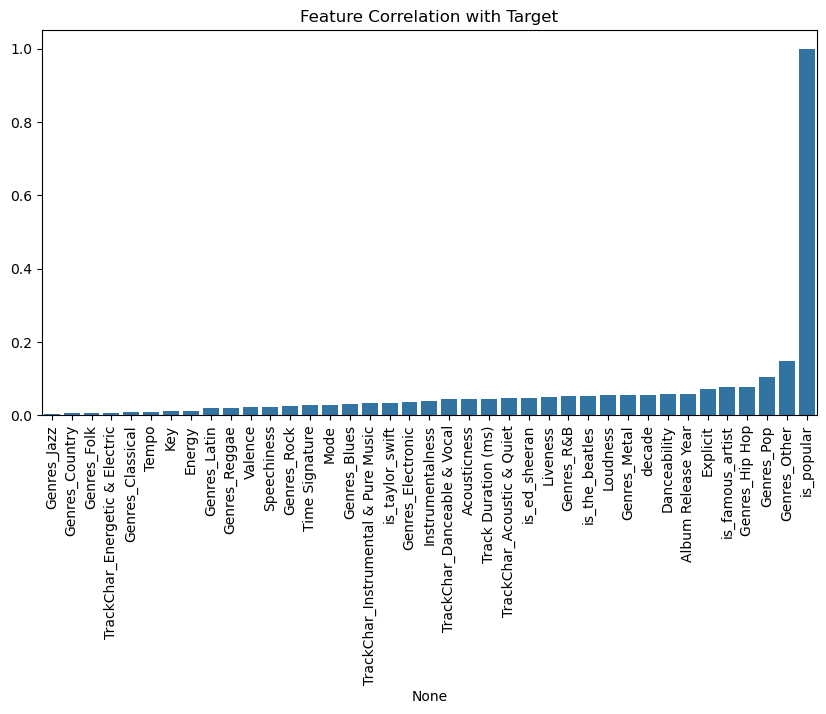

In [717]:
# Compute correlation with the target variable
correlation_matrix = df_cleaned.corr()
correlation_with_target = correlation_matrix["is_popular"].abs().sort_values()

# Plot correlation heatmap
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Target")
plt.show()


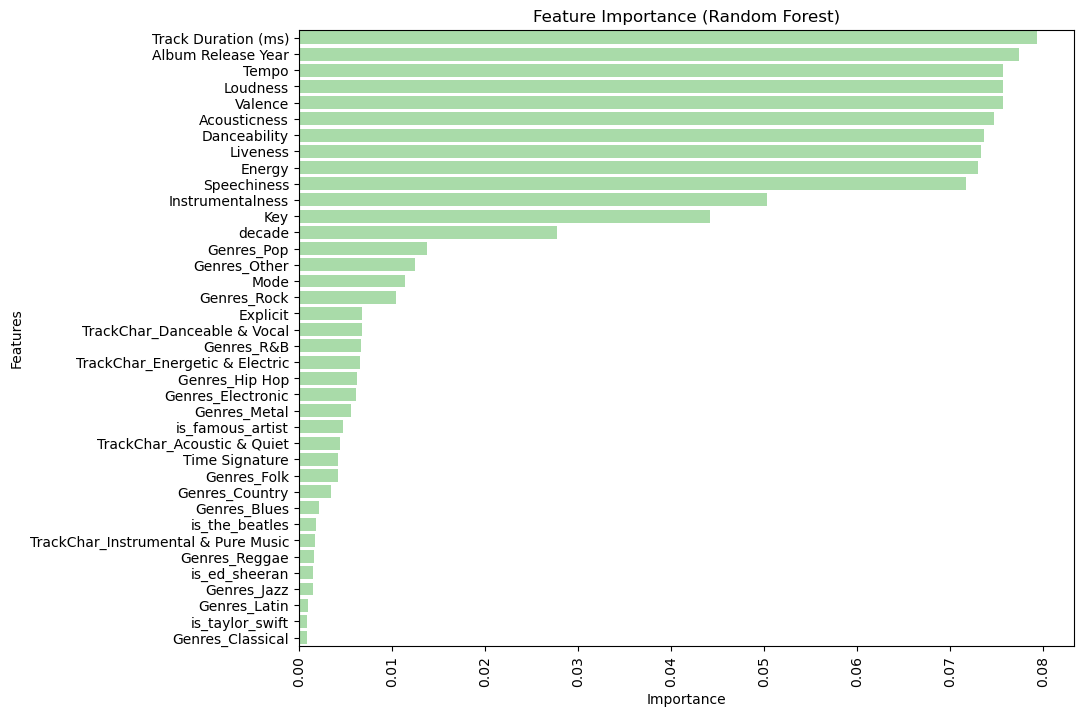

In [723]:
# === 1. Data Preprocessing ===
X = df_cleaned.drop(columns=["is_popular"])
y = df_cleaned["is_popular"]

numerical_features = ["Track Duration (ms)", "Danceability", "Energy", "Key", "Loudness", 
                      "Mode", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", 
                      "Valence", "Tempo", "Time Signature", "Album Release Year", 'decade']

scaler = StandardScaler()
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 2. Train RandomForest and Compute Feature Importances ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X_train.columns, 
    "Importance": rf.feature_importances_
})

# Sort by importance (Descending for readability)
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
#sns.barplot(x=feature_importances["Feature"], y=feature_importances["Importance"], color="#A1E3A1")
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], color="#A1E3A1")
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# === 3. Select Important Features ===
selected_features = feature_importances[feature_importances["Importance"] > 0.04]["Feature"].tolist()

# Filter dataset with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

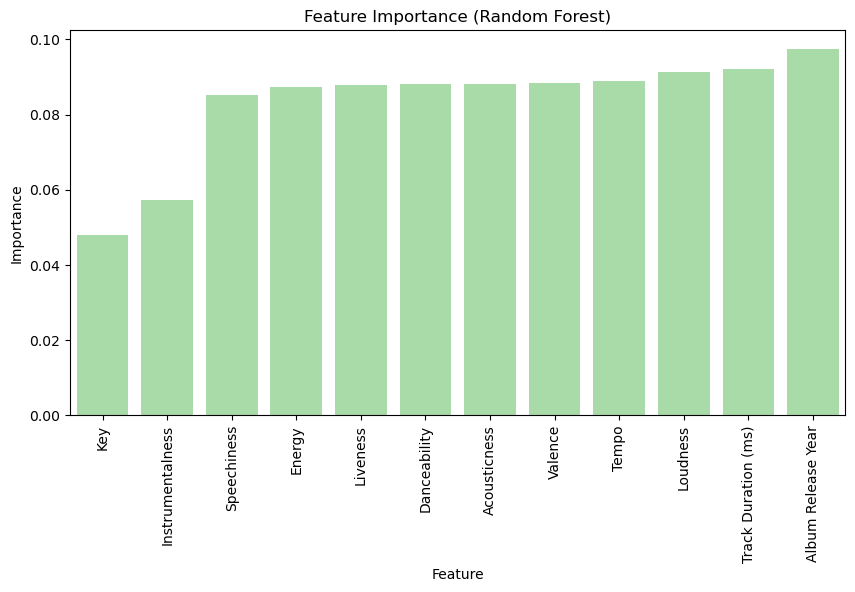

In [719]:
# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({"Feature": X_train.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances["Feature"], y=feature_importances["Importance"], color="#A1E3A1")
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [648]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7956, 12), (1990, 12), (7956,), (1990,))

Training Random Forest...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5289, number of negative: 5289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3390
[LightGBM] [Info] Number of data points in the train set: 10578, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Logistic Regression...
Training XGBoost...
Training Gradient Boosting...
Training SVM...

===== Best Thresholds for Each Model =====
{'Random Forest': 0.5828333333333333, 'LightGBM': 0.45550416734849725, 'Logistic Regression': 0.5378650901198232, 'XGBoost': 0.48213914, 'Gradient Boosting': 0.36415043089197474, 'SVM': 0.3896807892099848}
Re-evaluating Random For

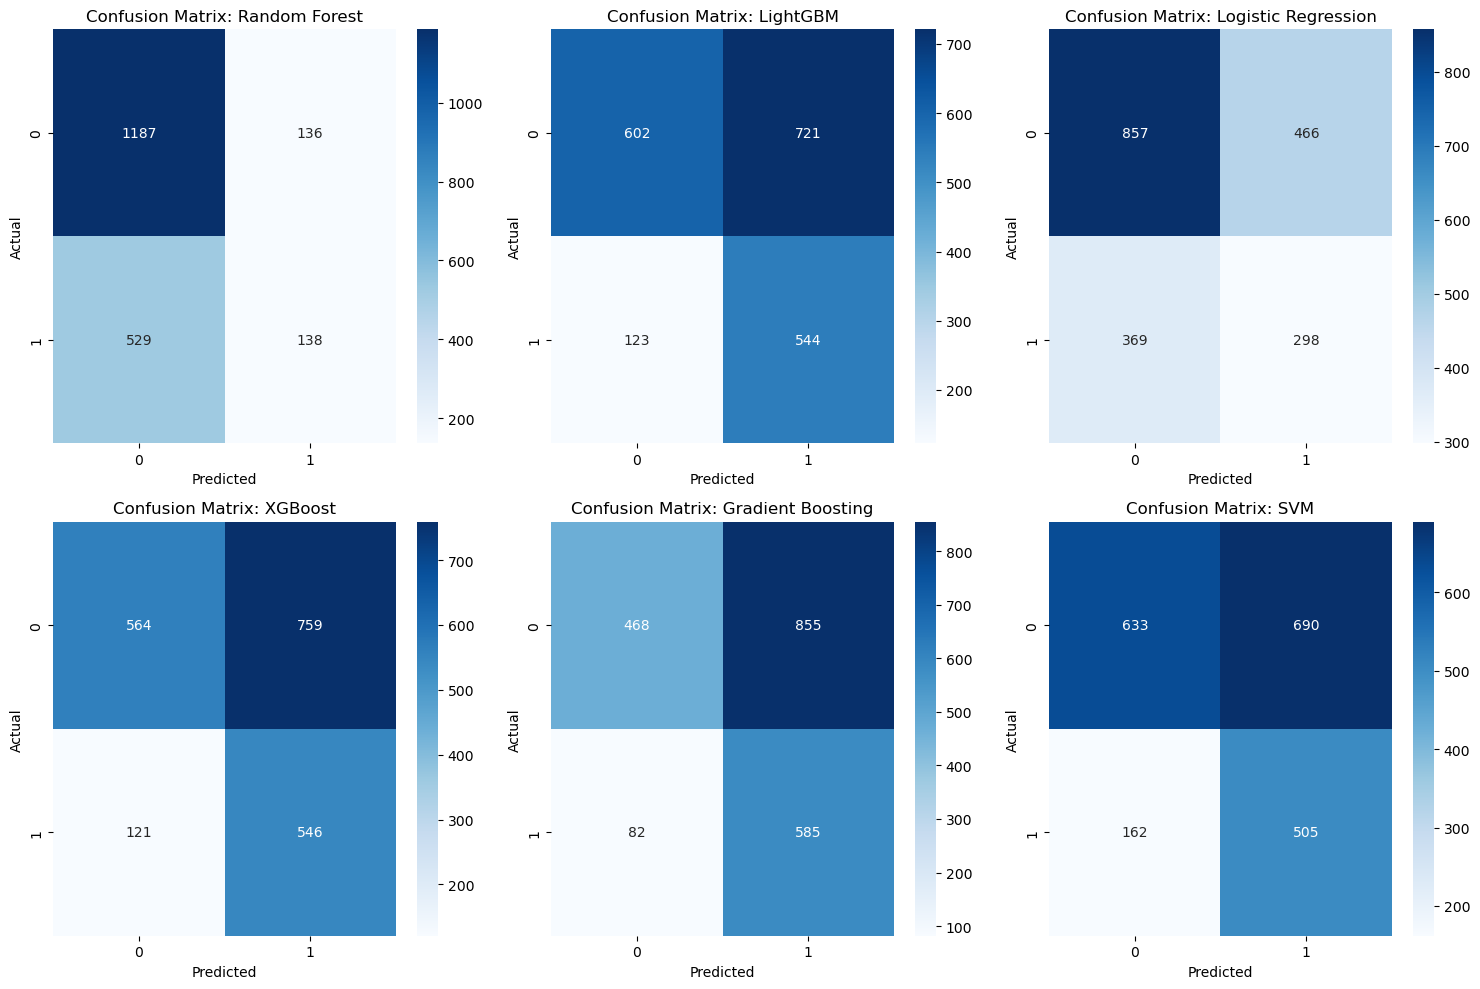

In [668]:
# === 1. Data Preprocessing ===
X = df_cleaned.drop(columns=["is_popular"])
y = df_cleaned["is_popular"]

numerical_features = ["Track Duration (ms)", "Danceability", "Energy", "Key", "Loudness", 
                      "Mode", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", 
                      "Valence", "Tempo", "Time Signature", "Album Release Year", "decade"]

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# === 2. Define Models with Class Weights ===
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced'),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42, 
                               scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced', penalty='l1', solver='liblinear'),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=42, 
                             scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
    "SVM": SVC(probability=True, random_state=42, class_weight='balanced')
}

# === 3. Train & Evaluate with Threshold Tuning ===
results = []
conf_matrices = {}
best_thresholds = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)

    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Adjust Threshold using Precision-Recall Curve
    if y_prob is not None:
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
        best_threshold = thresholds[np.argmax(2 * (precisions * recalls) / (precisions + recalls))]
        
        # Lower threshold for Random Forest & Logistic Regression
        if name in ["Random Forest", "Logistic Regression"]:
            best_threshold *= 0.65  
        
        best_thresholds[name] = best_threshold
        y_pred = (y_prob >= best_threshold).astype(int)
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Save results to CSV for reference
results_df.to_csv("model_comparison_results_with_threshold.csv", index=False)

# Print best thresholds
print("\n===== Best Thresholds for Each Model =====")
print(best_thresholds)

# === 4. Re-evaluate Models with Best Thresholds ===
adjusted_results = []
adjusted_conf_matrices = {}

for name, model in models.items():
    print(f"Re-evaluating {name} with best threshold {best_thresholds[name]:.4f}...")

    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    if y_prob is not None:
        best_threshold = best_thresholds[name]
        y_pred = (y_prob >= best_threshold).astype(int)
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    adjusted_conf_matrices[name] = confusion_matrix(y_test, y_pred)

    adjusted_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    })

# Convert adjusted results to DataFrame
adjusted_results_df = pd.DataFrame(adjusted_results).sort_values(by="F1-Score", ascending=False)

# Print adjusted model performance
print("\n===== Adjusted Model Performance Metrics =====")
print(adjusted_results_df)

# === 4. Plot Confusion Matrices ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()